### Обучение дерева решений на примере Титаника

In [1]:
# импортирую библиотеки

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

# отключение ворнингов
import warnings
warnings.filterwarnings('ignore')

# настройка размеров графиков
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

# настройка стиля графиков
plt.style.use('fivethirtyeight')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# читаю данные

data = pd.read_csv('titanic.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# выведу долю пропусков по столбцам

data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [4]:
# удалю признак с большой долей пропусков

data.drop('Cabin', axis=1, inplace=True)

# заполню пропуски возраста медианным значением

age_median = np.median(data[data['Age'].isnull() == False]['Age'])
data['Age'].fillna(age_median, inplace=True)
data.dropna(inplace=True)

In [5]:
# запишу категориальные переменные
cat = [col for col in data.columns if data[col].dtype=='object']

# закодирую их как есть

data[cat] = data[cat].apply(LabelEncoder().fit_transform)

In [6]:
# воспроизводимость
rs = np.random.seed(0)

X = data.drop('Survived', axis=1)
y = data['Survived']

# разобью данные на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=rs)

tree_params = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,50),
    'min_samples_leaf':range(2,5)
}

# подбор гиперпараметров и обучение модели

grid_clf = GridSearchCV(estimator=DecisionTreeClassifier(random_state=rs), param_grid=tree_params, cv=5)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50),
                         

In [7]:
# построю бинарный прогноз и вероятность отнесения к классу 1

y_pred = grid_clf.predict(X_test)
y_pred_prob = grid_clf.predict_proba(X_test)[:,1]

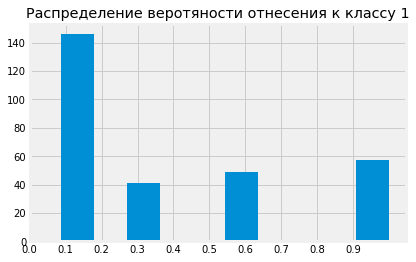

In [8]:
# построю распределение предсказанных вероятностей

plt.hist(y_pred_prob)
plt.title('Распределение веротяности отнесения к классу 1')
plt.xticks(np.arange(0,1,.1));

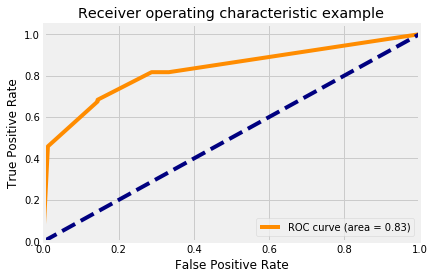

In [9]:
# построю ROC кривую

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### precision = TP/(TP +FP)

### recall(TPR) = TP/(TP + FN)

### FPR = FP/(FP + TN)

In [10]:
# выведу основные метрики классификации

print('Precision score: ', precision_score(y_test, y_pred))
print('==================================================')
print('Recall score: ', recall_score(y_test, y_pred))
print('==================================================')
print('F1 score: ', f1_score(y_test, y_pred))
print('==================================================')
print('ROC-AUC score: ', roc_auc_score(y_test, y_pred_prob))

Precision score:  0.7641509433962265
Recall score:  0.675
F1 score:  0.7168141592920354
ROC-AUC score:  0.8286398467432949
